In [217]:
# allow output from every line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

In [218]:
nhl_stats = pd.read_csv("data/nhlCapEraStats.csv")
nhl_stats

,Rk,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,...,SHA,PIM/G,oPIM/G,S,S_pct,SA,SV%,SO,Year,TeamID
0,32,Anaheim Ducks,28.2,82,23,47,12,58,0.354,206,...,7,11.3,9.3,2326,8.9,3207,0.896,1,2023,ANA
1,23,Anaheim Ducks,27.9,82,31,37,14,76,0.463,228,...,4,9.3,9.8,2393,9.5,2725,0.902,4,2022,ANA
2,30,Anaheim Ducks,28.2,56,17,30,9,43,0.384,124,...,5,8.9,7.3,1500,8.3,1712,0.897,4,2021,ANA
3,27,Anaheim Ducks,27.8,71,29,33,9,67,0.472,182,...,5,10.2,8.5,2106,8.6,2282,0.901,1,2020,ANA
4,24,Anaheim Ducks,27.5,82,35,37,10,80,0.488,196,...,10,9.0,7.2,2271,8.6,2725,0.909,4,2019,ANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,15,Winnipeg Jets*,28.3,56,30,23,3,63,0.563,170,...,3,7.2,7.9,1661,10.2,1713,0.911,5,2021,WPG
544,14,Winnipeg Jets*,26.5,71,37,28,6,80,0.563,213,...,3,7.4,8.6,2222,9.6,2315,0.913,6,2020,WPG
545,10,Winnipeg Jets*,26.6,82,47,30,5,99,0.604,270,...,7,9.3,8.7,2557,10.6,2741,0.911,3,2019,WPG
546,2,Winnipeg Jets*,26.8,82,52,20,10,114,0.695,273,...,7,8.5,8.6,2643,10.3,2613,0.917,7,2018,WPG


In [219]:
# Renaming percentage columns
nhl_stats = nhl_stats.rename(columns={"PTS%":"PTS_pct","PP%":"PP_pct","PK%":"PK_pct","SV%":"SV_pct"})

# Adding columns to rank specific statistics by season
nhl_stats['GF_rank'] = nhl_stats.groupby("Year")['GF'].rank(ascending=False, method='first')
nhl_stats['GA_rank'] = nhl_stats.groupby("Year")['GA'].rank(ascending=True, method='first')
nhl_stats['SV_pct_rank'] = nhl_stats.groupby("Year")['SV_pct'].rank(ascending=False, method='first')
nhl_stats['PP_pct_rank'] = nhl_stats.groupby("Year")['PP_pct'].rank(ascending=False, method='first')
nhl_stats['PK_pct_rank'] = nhl_stats.groupby("Year")['PK_pct'].rank(ascending=False, method='first')

# Adding columns for playoff teams, President's Trophy Winners, and Stanley Cup Champions
nhl_stats['Playoffs'] = "No"
nhl_stats.loc[(nhl_stats.Team.str.contains("*",regex=False)), "Playoffs"] = "Yes"
nhl_stats['Pres_Trophy'] = "No"
nhl_stats.loc[(nhl_stats.Team.str.contains("#",regex=False)), "Pres_Trophy"] = "Yes"
nhl_stats['Stanley_Cup'] = "No"
nhl_stats.loc[(nhl_stats.Team.str.contains("+",regex=False)), "Stanley_Cup"] = "Yes"

# Renaming "Rk" Column to represent ranking for the season
nhl_stats = nhl_stats.rename(columns={"Rk":"Season_Rank"})
nhl_stats

,Season_Rank,Team,AvAge,GP,W,L,OL,PTS,PTS_pct,GF,...,Year,TeamID,GF_rank,GA_rank,SV_pct_rank,PP_pct_rank,PK_pct_rank,Playoffs,Pres_Trophy,Stanley_Cup
0,32,Anaheim Ducks,28.2,82,23,47,12,58,0.354,206,...,2023,ANA,31.0,32.0,18.0,31.0,31.0,No,No,No
1,23,Anaheim Ducks,27.9,82,31,37,14,76,0.463,228,...,2022,ANA,24.0,23.0,18.0,14.0,10.0,No,No,No
2,30,Anaheim Ducks,28.2,56,17,30,9,43,0.384,124,...,2021,ANA,31.0,23.0,25.0,31.0,16.0,No,No,No
3,27,Anaheim Ducks,27.8,71,29,33,9,67,0.472,182,...,2020,ANA,26.0,28.0,18.0,30.0,26.0,No,No,No
4,24,Anaheim Ducks,27.5,82,35,37,10,80,0.488,196,...,2019,ANA,31.0,17.0,9.0,24.0,20.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,15,Winnipeg Jets*,28.3,56,30,23,3,63,0.563,170,...,2021,WPG,12.0,10.0,6.0,7.0,13.0,Yes,No,No
544,14,Winnipeg Jets*,26.5,71,37,28,6,80,0.563,213,...,2020,WPG,16.0,12.0,7.0,15.0,22.0,Yes,No,No
545,10,Winnipeg Jets*,26.6,82,47,30,5,99,0.604,270,...,2019,WPG,7.0,15.0,8.0,4.0,22.0,Yes,No,No
546,2,Winnipeg Jets*,26.8,82,52,20,10,114,0.695,273,...,2018,WPG,2.0,5.0,5.0,5.0,9.0,Yes,No,No


In [220]:
# Replacing footnote marks in team column, setting team column as index.
nhl_stats.Team = nhl_stats.Team.str.replace("*","",regex=False)
nhl_stats.Team = nhl_stats.Team.str.replace("#","",regex=False)
nhl_stats.Team = nhl_stats.Team.str.replace("+","",regex=False)
nhl_stats = nhl_stats.set_index("Team")
nhl_stats

,Season_Rank,AvAge,GP,W,L,OL,PTS,PTS_pct,GF,GA,...,Year,TeamID,GF_rank,GA_rank,SV_pct_rank,PP_pct_rank,PK_pct_rank,Playoffs,Pres_Trophy,Stanley_Cup
Team,,,,,,,,,,,,,,,,,,,,,
Anaheim Ducks,32,28.2,82,23,47,12,58,0.354,206,335,...,2023,ANA,31.0,32.0,18.0,31.0,31.0,No,No,No
Anaheim Ducks,23,27.9,82,31,37,14,76,0.463,228,266,...,2022,ANA,24.0,23.0,18.0,14.0,10.0,No,No,No
Anaheim Ducks,30,28.2,56,17,30,9,43,0.384,124,177,...,2021,ANA,31.0,23.0,25.0,31.0,16.0,No,No,No
Anaheim Ducks,27,27.8,71,29,33,9,67,0.472,182,225,...,2020,ANA,26.0,28.0,18.0,30.0,26.0,No,No,No
Anaheim Ducks,24,27.5,82,35,37,10,80,0.488,196,248,...,2019,ANA,31.0,17.0,9.0,24.0,20.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winnipeg Jets,15,28.3,56,30,23,3,63,0.563,170,152,...,2021,WPG,12.0,10.0,6.0,7.0,13.0,Yes,No,No
Winnipeg Jets,14,26.5,71,37,28,6,80,0.563,213,201,...,2020,WPG,16.0,12.0,7.0,15.0,22.0,Yes,No,No
Winnipeg Jets,10,26.6,82,47,30,5,99,0.604,270,243,...,2019,WPG,7.0,15.0,8.0,4.0,22.0,Yes,No,No


In [221]:
# Creating new data sets for playoff teams, president's trophy winner's, and stanley cup champions
nhl_stats_playoff_teams = nhl_stats[nhl_stats.Playoffs == "Yes"]
nhl_stats_playoff_teams
nhl_stats_pres_trophy = nhl_stats[nhl_stats.Pres_Trophy == "Yes"]
nhl_stats_pres_trophy.sort_values(by='Year')
nhl_stats_stanley_cup = nhl_stats[nhl_stats.Stanley_Cup == "Yes"]
nhl_stats_stanley_cup.sort_values(by='Year')

,Season_Rank,AvAge,GP,W,L,OL,PTS,PTS_pct,GF,GA,...,Year,TeamID,GF_rank,GA_rank,SV_pct_rank,PP_pct_rank,PK_pct_rank,Playoffs,Pres_Trophy,Stanley_Cup
Team,,,,,,,,,,,,,,,,,,,,,
Anaheim Ducks,9,28.7,82,44,25,13,101,0.616,231,209,...,2018,ANA,18.0,3.0,1.0,23.0,5.0,Yes,No,No
Anaheim Ducks,6,27.6,82,46,23,13,105,0.640,220,197,...,2017,ANA,18.0,3.0,3.0,17.0,4.0,Yes,No,No
Anaheim Ducks,7,27.4,82,46,25,11,103,0.628,215,188,...,2016,ANA,17.0,1.0,5.0,1.0,1.0,Yes,No,No
Anaheim Ducks,3,27.0,82,51,24,7,109,0.665,228,221,...,2015,ANA,11.0,20.0,23.0,28.0,15.0,Yes,No,No
Anaheim Ducks,2,27.7,82,54,20,8,116,0.707,263,203,...,2014,ANA,1.0,9.0,9.0,22.0,13.0,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Winnipeg Jets,15,28.3,56,30,23,3,63,0.563,170,152,...,2021,WPG,12.0,10.0,6.0,7.0,13.0,Yes,No,No
Winnipeg Jets,14,26.5,71,37,28,6,80,0.563,213,201,...,2020,WPG,16.0,12.0,7.0,15.0,22.0,Yes,No,No
Winnipeg Jets,10,26.6,82,47,30,5,99,0.604,270,243,...,2019,WPG,7.0,15.0,8.0,4.0,22.0,Yes,No,No


,Season_Rank,AvAge,GP,W,L,OL,PTS,PTS_pct,GF,GA,...,Year,TeamID,GF_rank,GA_rank,SV_pct_rank,PP_pct_rank,PK_pct_rank,Playoffs,Pres_Trophy,Stanley_Cup
Team,,,,,,,,,,,,,,,,,,,,,
Detroit Red Wings,1,32.1,82,58,16,8,124,0.756,301,206,...,2006,DET,2.0,3.0,9.0,1.0,3.0,Yes,Yes,No
Buffalo Sabres,1,27.2,82,53,22,7,113,0.689,298,238,...,2007,BUF,1.0,13.0,14.0,17.0,20.0,Yes,Yes,No
Detroit Red Wings,1,32.1,82,54,21,7,115,0.701,252,179,...,2008,DET,3.0,1.0,14.0,3.0,8.0,Yes,Yes,Yes
San Jose Sharks,1,28.7,82,53,18,11,117,0.713,251,199,...,2009,SJS,8.0,3.0,9.0,3.0,5.0,Yes,Yes,No
Washington Capitals,1,27.2,82,54,15,13,121,0.738,313,227,...,2010,WAS,1.0,16.0,15.0,1.0,25.0,Yes,Yes,No
Vancouver Canucks,1,28.1,82,54,19,9,117,0.713,258,180,...,2011,VAN,1.0,1.0,2.0,1.0,3.0,Yes,Yes,No
Vancouver Canucks,1,28.5,82,51,22,9,111,0.677,241,191,...,2012,VAN,6.0,4.0,4.0,4.0,6.0,Yes,Yes,No
Chicago Blackhawks,1,26.8,48,36,7,5,77,0.802,149,97,...,2013,CHI,2.0,1.0,3.0,19.0,3.0,Yes,Yes,Yes
Boston Bruins,1,27.6,82,54,19,9,117,0.713,258,171,...,2014,BOS,3.0,2.0,1.0,3.0,8.0,Yes,Yes,No


,Season_Rank,AvAge,GP,W,L,OL,PTS,PTS_pct,GF,GA,...,Year,TeamID,GF_rank,GA_rank,SV_pct_rank,PP_pct_rank,PK_pct_rank,Playoffs,Pres_Trophy,Stanley_Cup
Team,,,,,,,,,,,,,,,,,,,,,
Carolina Hurricanes,3,29.2,82,52,22,8,112,0.683,286,258,...,2006,CAR,3.0,20.0,15.0,17.0,19.0,Yes,No,Yes
Anaheim Ducks,4,28.5,82,48,20,14,110,0.671,254,198,...,2007,ANA,8.0,7.0,6.0,3.0,5.0,Yes,No,Yes
Detroit Red Wings,1,32.1,82,54,21,7,115,0.701,252,179,...,2008,DET,3.0,1.0,14.0,3.0,8.0,Yes,Yes,Yes
Pittsburgh Penguins,8,26.6,82,45,28,9,99,0.604,258,233,...,2009,PIT,6.0,17.0,15.0,20.0,8.0,Yes,No,Yes
Chicago Blackhawks,3,26.6,82,52,22,8,112,0.683,262,203,...,2010,CHI,3.0,6.0,23.0,16.0,4.0,Yes,No,Yes
Boston Bruins,7,28.3,82,46,25,11,103,0.628,244,189,...,2011,BOS,5.0,2.0,1.0,20.0,16.0,Yes,No,Yes
Los Angeles Kings,13,26.7,82,40,27,15,95,0.579,188,170,...,2012,LAK,29.0,2.0,3.0,17.0,4.0,Yes,No,Yes
Chicago Blackhawks,1,26.8,48,36,7,5,77,0.802,149,97,...,2013,CHI,2.0,1.0,3.0,19.0,3.0,Yes,Yes,Yes
Los Angeles Kings,10,27.4,82,46,28,8,100,0.610,198,168,...,2014,LAK,26.0,1.0,2.0,27.0,11.0,Yes,No,Yes


<IPython.core.display.Javascript object>


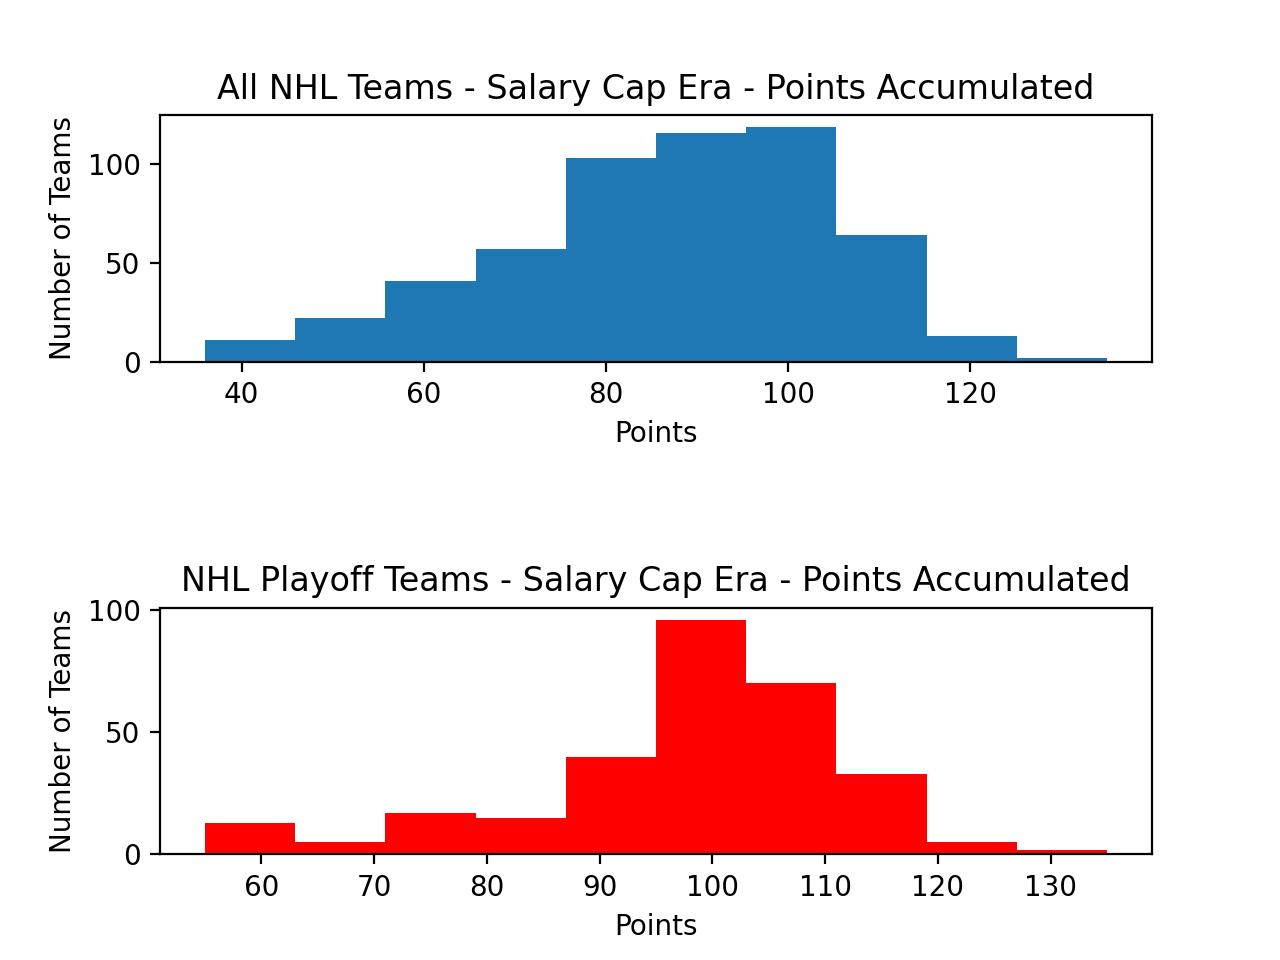

(array([ 11.,  22.,  41.,  57., 103., 116., 119.,  64.,  13.,   2.]),
 array([ 36. ,  45.9,  55.8,  65.7,  75.6,  85.5,  95.4, 105.3, 115.2,
        125.1, 135. ]),
 <BarContainer object of 10 artists>)

(array([13.,  5., 17., 15., 40., 96., 70., 33.,  5.,  2.]),
 array([ 55.,  63.,  71.,  79.,  87.,  95., 103., 111., 119., 127., 135.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Points')

Text(0, 0.5, 'Number of Teams')

Text(0.5, 0, 'Points')

Text(0, 0.5, 'Number of Teams')

Text(0.5, 1.0, 'All NHL Teams - Salary Cap Era - Points Accumulated')

Text(0.5, 1.0, 'NHL Playoff Teams - Salary Cap Era - Points Accumulated')

In [231]:
# How to make the playoffs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.hist(nhl_stats.PTS)
ax2.hist(nhl_stats_playoff_teams.PTS, color = 'r')
ax1.set_xlabel("Points")
ax1.set_ylabel("Number of Teams")
ax2.set_xlabel("Points")
ax2.set_ylabel("Number of Teams")
fig.subplots_adjust(wspace=0,hspace=1)
ax1.set_title("All NHL Teams - Salary Cap Era - Points Accumulated")
ax2.set_title("NHL Playoff Teams - Salary Cap Era - Points Accumulated")
fig.savefig("PointsHistograms.pdf")

<IPython.core.display.Javascript object>


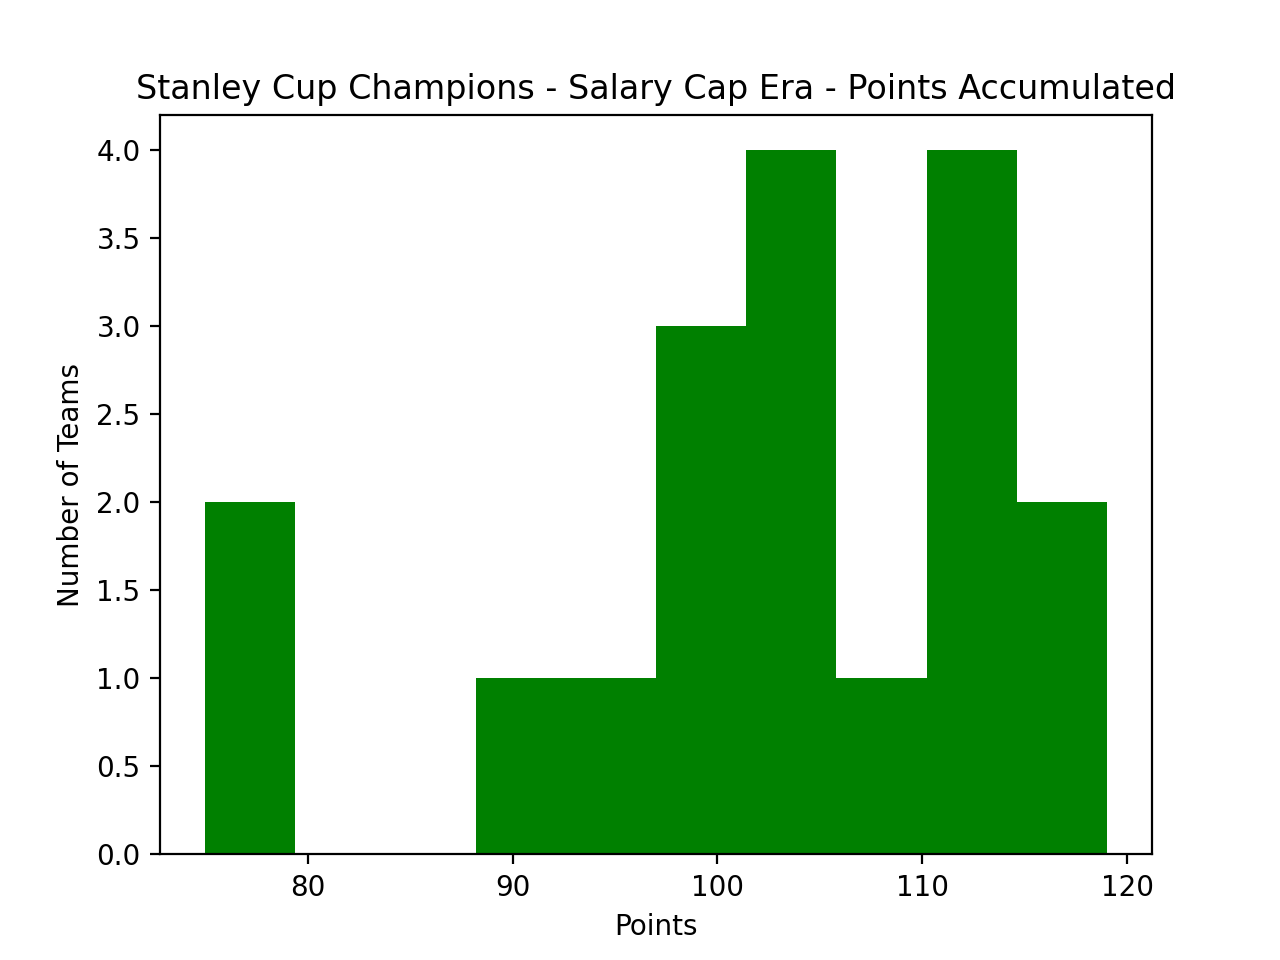

(array([2., 0., 0., 1., 1., 3., 4., 1., 4., 2.]),
 array([ 75. ,  79.4,  83.8,  88.2,  92.6,  97. , 101.4, 105.8, 110.2,
        114.6, 119. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Points')

Text(0, 0.5, 'Number of Teams')

Text(0.5, 1.0, 'Stanley Cup Champions - Salary Cap Era - Points Accumulated')

,TeamID,Year,GP,PTS
Team,,,,
Chicago Blackhawks,CHI,2013,48,77
Tampa Bay Lightning,TBL,2021,56,75


,TeamID,Year,GP,PTS
Team,,,,
Chicago Blackhawks,CHI,2013,48,77
Detroit Red Wings,DET,2008,82,115


In [232]:
# Stanley Cup Champions
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.hist(nhl_stats_stanley_cup.PTS, color = 'green')
ax1.set_xlabel("Points")
ax1.set_ylabel("Number of Teams")
ax1.set_title("Stanley Cup Champions - Salary Cap Era - Points Accumulated")
fig.savefig("StanleyCupHistogram.pdf")

# Stanley Cup Champions with less than 90 points
nhl_stats_low_points_champions = nhl_stats[(nhl_stats.Stanley_Cup == "Yes") & (nhl_stats.PTS < 90)]
nhl_stats_low_points_champions[['TeamID','Year','GP','PTS']]

# President's Trophy Winners & Stanley Cup Champions
nhl_stats_pres_cup_winners = nhl_stats[(nhl_stats.Pres_Trophy == "Yes") & (nhl_stats.Stanley_Cup == "Yes")]
nhl_stats_pres_cup_winners[['TeamID','Year','GP','PTS']]

<IPython.core.display.Javascript object>


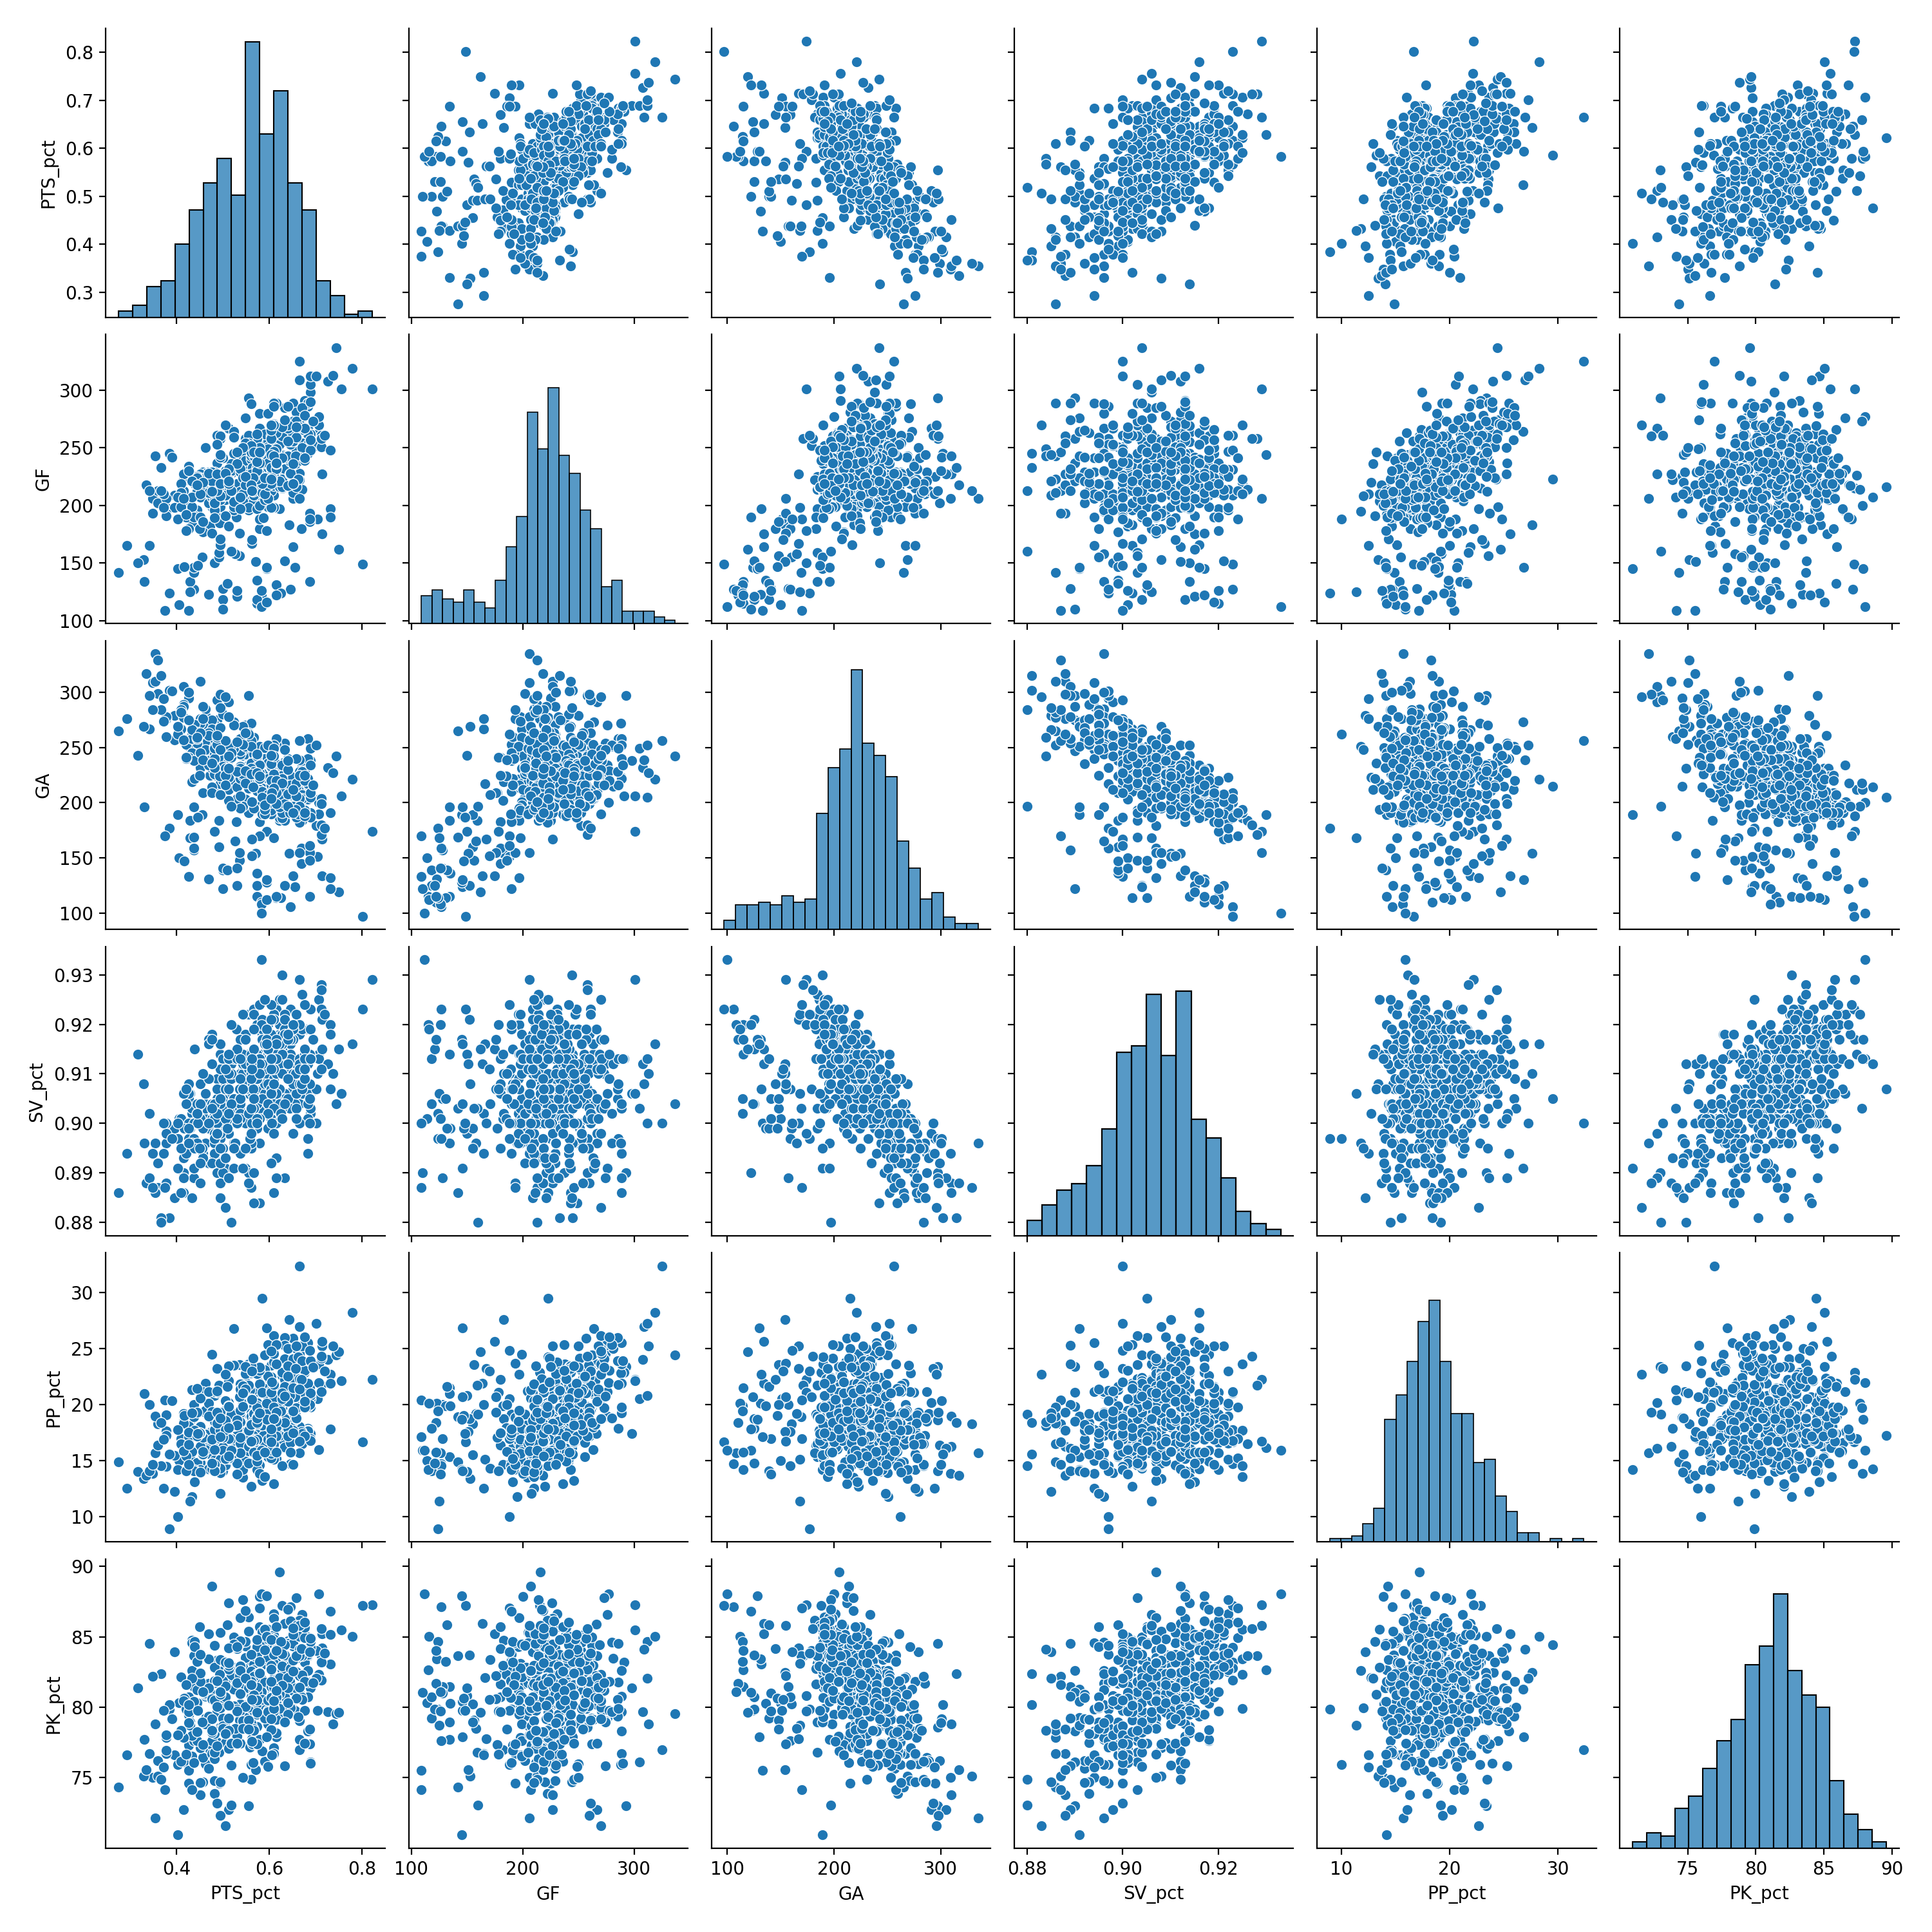

/Users/tkkuchan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


In [233]:
# Scatter Plots for Selected Categories
nhl_teams_selected_data = nhl_stats[['PTS_pct','GF','GA','SV_pct','PP_pct','PK_pct']]
sns.pairplot(nhl_teams_selected_data).savefig("pairplotNHLteams.pdf")

In [212]:
# Average rankings in 5 categories for playoff teams
nhl_playoff_team_average_rankings = nhl_stats_playoff_teams[['Year','AvAge','GF_rank','GA_rank','SV_pct_rank',
                                                             'PP_pct_rank','PK_pct_rank']].groupby(['Year']).mean(numeric_only = True)
nhl_playoff_team_average_rankings

nhl_playoff_team_total_average_rankings = nhl_stats_playoff_teams.mean(numeric_only = True)
nhl_playoff_team_total_average_rankings[['AvAge','PTS_pct','GF_rank','GA_rank','SV_pct_rank',
                                        'PP_pct_rank','PK_pct_rank']]

# Average rankings in 5 categories for stanley cup champions
nhl_cup_winners_average_rankings = nhl_stats_stanley_cup[['TeamID','Year','AvAge','GF_rank','GA_rank','SV_pct_rank',
                                                          'PP_pct_rank','PK_pct_rank']].groupby(['TeamID','Year']).mean(numeric_only = True)

nhl_cup_winners_average_rankings = nhl_cup_winners_average_rankings.sort_values(by='Year')
nhl_cup_winners_average_rankings

nhl_cup_winners_total_average_rankings = nhl_stats_stanley_cup.mean(numeric_only = True)
nhl_cup_winners_total_average_rankings[['AvAge','PTS_pct','GF_rank','GA_rank','SV_pct_rank',
                                        'PP_pct_rank','PK_pct_rank']]

,AvAge,GF_rank,GA_rank,SV_pct_rank,PP_pct_rank,PK_pct_rank
Year,,,,,,
2006,28.587500,11.1875,9.6875,12.8750,11.812500,12.187500
2007,28.393750,11.9375,9.0000,9.5625,12.000000,12.437500
2008,28.462500,13.5625,10.5000,11.8125,13.625000,13.312500
2009,27.918750,10.8125,11.8125,13.0000,12.750000,12.562500
2010,27.950000,12.0625,10.2500,12.6875,12.937500,12.187500
2011,27.737500,11.1875,10.1875,10.5625,12.812500,12.187500
2012,28.006250,11.5000,10.6875,12.5625,13.687500,13.250000
2013,27.625000,12.5625,9.5625,11.1875,13.000000,12.187500
2014,27.631250,10.8750,9.5000,11.0625,13.625000,12.437500


AvAge          28.151014
PTS_pct         0.625111
GF_rank        11.172297
GA_rank        10.273649
SV_pct_rank    11.493243
PP_pct_rank    12.614865
PK_pct_rank    12.716216
dtype: float64

,,AvAge,GF_rank,GA_rank,SV_pct_rank,PP_pct_rank,PK_pct_rank
TeamID,Year,,,,,,
CAR,2006,29.2,3.0,20.0,15.0,17.0,19.0
ANA,2007,28.5,8.0,7.0,6.0,3.0,5.0
DET,2008,32.1,3.0,1.0,14.0,3.0,8.0
PIT,2009,26.6,6.0,17.0,15.0,20.0,8.0
CHI,2010,26.6,3.0,6.0,23.0,16.0,4.0
BOS,2011,28.3,5.0,2.0,1.0,20.0,16.0
LAK,2012,26.7,29.0,2.0,3.0,17.0,4.0
CHI,2013,26.8,2.0,1.0,3.0,19.0,3.0
LAK,2014,27.4,26.0,1.0,2.0,27.0,11.0


AvAge          28.277778
PTS_pct         0.659333
GF_rank         8.777778
GA_rank         7.777778
SV_pct_rank     8.944444
PP_pct_rank    13.166667
PK_pct_rank    10.500000
dtype: float64

In [213]:
# Skaters & Goalies
skaters = pd.read_csv("data/nhlCapEraSkaters.csv")
goalies = pd.read_csv("data/nhlCapEraGoalies.csv")

# Cleaning Data
skaters = skaters.rename(columns={"Rk":"Season_Rank","+/-":"Plus_minus","S%":"S_pct","FO%":"FO_pct",
                                  "-9999":"playerID"})
goalies = goalies.rename(columns={"SV%":"SV_pct","QS%":"QS_pct","GA%-":"GA_pct","-9999":"playerID"})
filtered_goalies = goalies[(goalies.GP > 10)]
filtered_goalies['Season_Rank'] = filtered_goalies.groupby("Year")["SV_pct"].rank(ascending=False, method="first")
filtered_goalies = filtered_goalies.drop(columns=['Rk'])

skaters_stats = skaters[['Player','Age','Tm','Season','PTS','Season_Rank']]
goalies_stats = filtered_goalies[['Player','Age','Tm','Year','GP','GA','SV_pct','Season_Rank']]
skaters_stats
goalies_stats

/var/folders/1r/31k4r9z535399lbqdbm6yx480000gn/T/ipykernel_3330/2720638201.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_goalies['Season_Rank'] = filtered_goalies.groupby("Year")["SV_pct"].rank(ascending=False, method="first")


,Player,Age,Tm,Season,PTS,Season_Rank
0,Connor McDavid,26,EDM,2023,153,1
1,Leon Draisaitl,27,EDM,2023,128,2
2,Nikita Kucherov,29,TBL,2023,113,3
3,David Pastrňák,26,BOS,2023,113,4
4,Nathan MacKinnon,27,COL,2023,111,5
...,...,...,...,...,...,...
355,Olli Jokinen,27,FLA,2006,89,16
356,Pavel Datsyuk,27,DET,2006,87,17
357,Joe Sakic*,36,COL,2006,87,18
358,Patrick Marleau,26,SJS,2006,86,19


,Player,Age,Tm,Year,GP,GA,SV_pct,Season_Rank
1,Cristobal Huet,30,MTL,2006,36,77,0.929,1.0
2,Dominik Hašek*,41,OTT,2006,43,90,0.925,2.0
3,Jean-Sébastien Aubin,28,TOR,2006,11,25,0.924,3.0
4,Miikka Kiprusoff,29,CGY,2006,74,151,0.923,4.0
5,Henrik Lundqvist*,23,NYR,2006,53,116,0.922,5.0
...,...,...,...,...,...,...,...,...
1658,Jonathan Quick,37,TOT,2023,41,127,0.882,73.0
1660,Felix Sandström,26,PHI,2023,20,69,0.880,74.0
1662,Elvis Merzļikins,28,CBJ,2023,30,110,0.876,75.0
1663,Michael Hutchinson,32,CBJ,2023,16,54,0.875,76.0


In [230]:
# Observing best skaters & goalies for Stanley Cup Champions
skaters_2017_pens = skaters_stats[(skaters_stats.Season == 2017) & (skaters_stats.Tm == "PIT")]
skaters_2020_tb = skaters_stats[(skaters_stats.Season == 2020) & (skaters_stats.Tm == "TBL")]
first_ranked_goals_for = pd.concat([skaters_2017_pens,skaters_2020_tb])
first_ranked_goals_for

goalies_2008_wings = goalies_stats[(goalies_stats.Year == 2008) & (goalies_stats.Tm == "DET")]
goalies_2013_chi = goalies_stats[(goalies_stats.Year == 2013) & (goalies_stats.Tm == "CHI")]
goalies_2014_kings = goalies_stats[(goalies_stats.Year == 2014) & (goalies_stats.Tm == "LAK")]
first_ranked_goals_allowed = pd.concat([goalies_2008_wings,goalies_2013_chi,goalies_2014_kings])
first_ranked_goals_allowed
nhl_stats_stanley_cup.SV_pct[7]
nhl_stats_stanley_cup.SV_pct[4]
nhl_stats_stanley_cup.SV_pct[9]

,Player,Age,Tm,Season,PTS,Season_Rank
121,Sidney Crosby,29,PIT,2017,89,2
134,Evgeni Malkin,30,PIT,2017,72,15
137,Phil Kessel,29,PIT,2017,70,18
66,Nikita Kucherov,26,TBL,2020,85,7


,Player,Age,Tm,Year,GP,GA,SV_pct,Season_Rank
204,Chris Osgood,35,DET,2008,43,84,0.914,21.0
229,Dominik Hašek*,43,DET,2008,41,84,0.902,43.0
617,Corey Crawford,28,CHI,2013,30,57,0.926,6.0
626,Ray Emery,30,CHI,2013,21,36,0.922,14.0
698,Martin Jones,24,LAK,2014,19,33,0.934,2.0
732,Jonathan Quick,28,LAK,2014,49,100,0.915,32.0


0.907

0.925

0.924

<IPython.core.display.Javascript object>


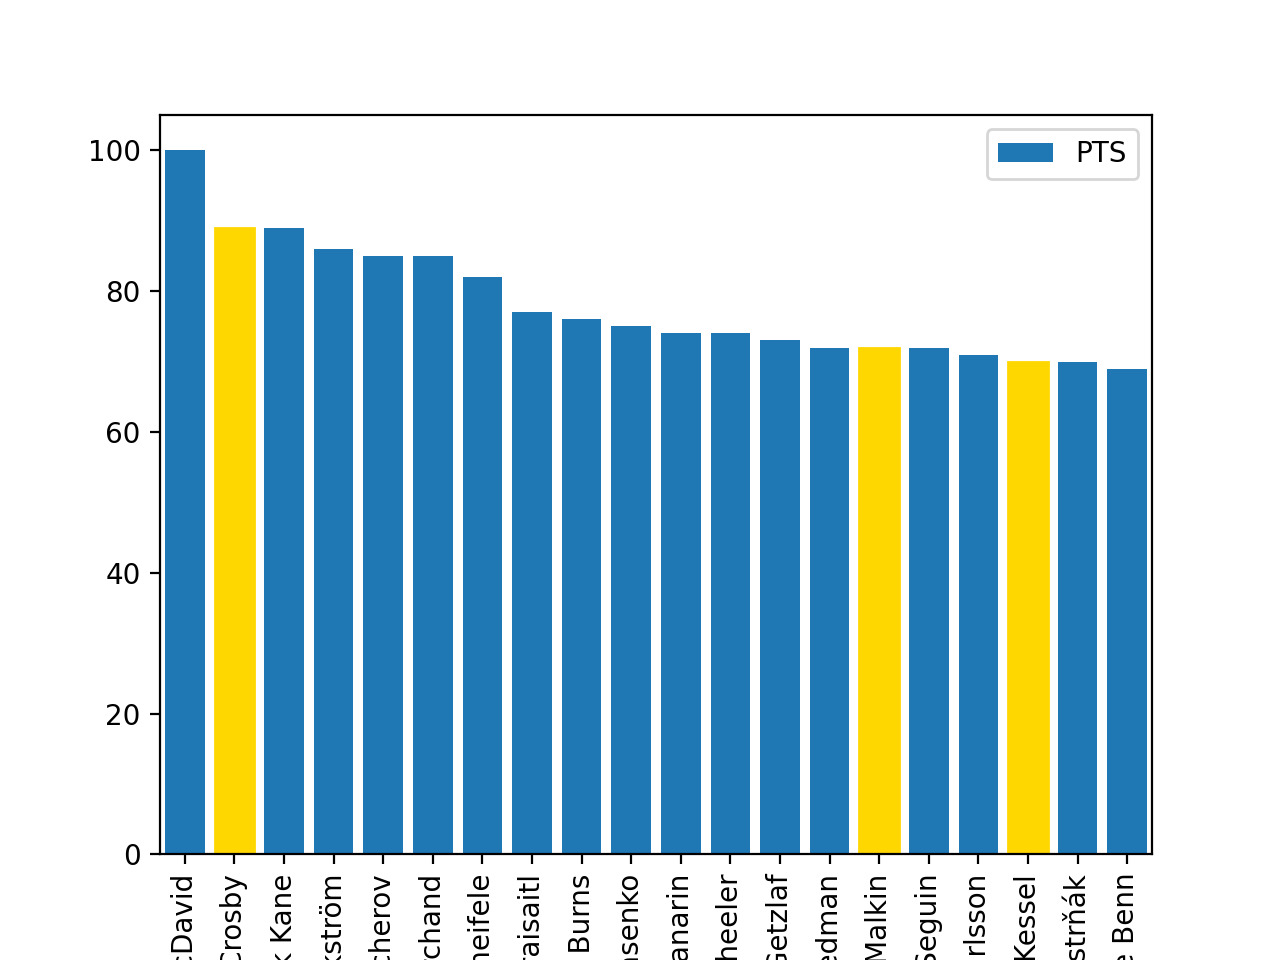

In [226]:
# Pittsburgh's best scorers vs. the NHL in 2017
skaters_2017 = skaters_stats[skaters_stats.Season == 2017]
skaters_2017.index = skaters_2017.Player
skaters_2017_ax = skaters_2017[['PTS']].plot.bar()
bars = plt.bar(skaters_2017.Player,skaters_2017.PTS)
bars[1].set_color('gold')
bars[14].set_color('gold')
bars[17].set_color('gold')